<a href="https://colab.research.google.com/github/pi-mishra/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION_(piyush).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name - HEALTH INSURANCE CROSS SELL PREDICTION


Project Type - Classification

Contribution - Individual


# Summary

The dataset used for this analysis contains 381109 rows and 12 columns, consisting of 6 integer, 3 object, and 3 float columns. The data has no null or duplicate values. The mean age of the individuals in the dataset is approximately 38 years, the average annual premium is around 30564, and the average vintage (i.e., number of days that the customer has been associated with the company) is around 154 days. There is a significant amount of variation in the data, as indicated by the standard deviation. The age of the individuals ranges from 20 to 85 years, the annual premium ranges from 2630 to 540165, and the vintage ranges from 10 to 299 days.

The maximum age of the individuals surveyed was 85 years old, and all of these respondents indicated that they were not interested in purchasing health insurance. As the age of the respondents increased, their level of interest in purchasing health insurance decreased. Both male and female respondents had the same minimum and maximum age ranges. However, there were more females with driving licenses compared to males. There are more male customers than female customers who have health insurance, indicating that males are more likely to purchase health insurance. Customers with a driving license are more inclined to consider purchasing health insurance, while those who were previously insured may not necessarily do so. Customers with vehicles aged between 1-2 years are more likely to buy health insurance, while those who have experienced vehicle damage are also more inclined to purchase insurance due to the associated maintenance costs.

Channel 152.0 appears to outperform other channels in terms of policy sales, although the meaning of policy channel codes is unknown. Customers aged between 38 to 50 are more likely to respond to insurance sales, while those aged between 20 to 30 are less likely to do so. 45.8% of customers have been previously insured, and only 12.3% of customers have shown interest in purchasing health insurance. Age and policy sales channels appear to be highly correlated, and there are outliers in the annual premium data.

After addressing the presence of outliers using the interquartile range method and multicollinearity using the variance inflation factor method, the data was split into training and testing sets. The Synthetic Minority Over-sampling Technique (SMOTE) was used to balance the dataset. A decision tree model performed the best out of all the models evaluated, with a training accuracy of 0.986 and a validation accuracy of 0.876, indicating that it is able to generalize well to unseen data. Logistic regression also performed well, with a validation accuracy of around 0.80, but not as well as the decision tree model. Hyperparameter tuning using random search and grid search did not lead to significant improvements in performance for any of the models.

In conclusion, based on the evaluation of the models, the decision tree model may be recommended for this project as it provides a high level of accuracy and is able to generalize well. However, further analysis and evaluation may be necessary to determine the best model for this specific project.

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

Table of content-

  1. Knowing Data
  2. Understanding the variable
  3. Data wrangling
  4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables
  5. Feature engineering
  6. Pre processing
  7. Model implimentation
  8. Conclusion

# 1. Knowing the Data

In [2]:
#importing the important packages

import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import math
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from datetime import datetime
import datetime as dt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/HEALTH INSURANCE CROSS SELL PREDICTION (piyush)/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df.shape

(381109, 12)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Observation- There are 381109 rows and 12 columns. We also checked and found there are no null and dublicate values. The dataframe consist of 6 integer, 3 object and 3 float columns.

# 2. Understanding your variables

In [10]:
df_num = df[['Age', 'Annual_Premium','Vintage']]

In [11]:
df_num.describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


In [12]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [13]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [14]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f'Unique value for {col}-{df[col].unique()}')

Unique value for Gender-['Male' 'Female']
Unique value for Vehicle_Age-['> 2 Years' '1-2 Year' '< 1 Year']
Unique value for Vehicle_Damage-['Yes' 'No']


Observation- Based on the above output, we can conclude that the mean age of the individuals in the dataset is around 38 years, the average annual premium is around 30564, and the average vintage (i.e., number of days that the customer has been associated with the company) is around 154 days. The standard deviation shows that there is a considerable amount of variation in the data. Additionally, the minimum and maximum values show that the age of the individuals ranges from 20 to 85 years, the annual premium ranges from 2630 to 540165, and the vintage ranges from 10 to 299 days.



# 3. Data Wrangling

In [15]:
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [16]:
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

In [17]:
male_data.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [18]:
male_data.shape

(206089, 12)

In [19]:
female_data.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0


In [20]:
male_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,206089.000000,206089.000000,206089.000000,206089.000000,206089.000000,206089.000000,206089.000000,206089.000000,206089.000000
mean,190656.298463,40.903095,0.997089,26.396173,0.420590,30622.649122,106.481763,154.153327,0.138411
std,109936.155169,15.449718,0.053879,13.220870,0.493655,17472.003849,55.242287,83.805931,0.345332
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95594.000000,26.000000,1.000000,15.000000,0.000000,24354.000000,26.000000,81.000000,0.000000
50%,190778.000000,41.000000,1.000000,28.000000,0.000000,31986.000000,124.000000,154.000000,0.000000
75%,285845.000000,52.000000,1.000000,35.000000,1.000000,39810.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [21]:
female_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,175020.000000,175020.000000,175020.000000,175020.000000,175020.000000,175020.000000,175020.000000,175020.000000,175020.000000
mean,190435.719352,36.372746,0.998789,26.380134,0.502508,30495.787990,118.572495,154.575917,0.103902
std,110111.958338,15.223969,0.034783,13.240531,0.499995,16903.067549,52.203715,83.512161,0.305135
min,5.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,94865.750000,24.000000,1.000000,15.000000,0.000000,24445.000000,122.000000,82.000000,0.000000
50%,190278.500000,30.000000,1.000000,28.000000,1.000000,31322.000000,152.000000,155.000000,0.000000
75%,285825.250000,46.000000,1.000000,36.000000,1.000000,38909.250000,152.000000,227.000000,0.000000
max,381108.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [22]:
print(male_data['Driving_License'].value_counts())
print()
print(female_data['Driving_License'].value_counts())

1    205489
0       600
Name: Driving_License, dtype: int64

1    174808
0       212
Name: Driving_License, dtype: int64


In [23]:
percent_m_dl = (205489/206089)*100
print('Percentage of males having driving licence: ',percent_m_dl)

percent_f_dl = (174808/175020)*100
print('Percentage of female having driving licence: ',percent_f_dl)

Percentage of males having driving licence:  99.70886364628873
Percentage of female having driving licence:  99.87887098617301


In [24]:
df_num.describe(percentiles=[0.99,0.97,0.95])

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
50%,36.000000,31669.000000,154.000000
95%,69.000000,55176.000000,285.000000
97%,72.000000,60680.000000,291.000000
99%,77.000000,72963.000000,297.000000
max,85.000000,540165.000000,299.000000


In [25]:
# filter the data for age 69, 72, and 77
age_filter_69 = df['Age'] == 69
age_data_69 = df[age_filter_69]

age_filter_72 = df['Age'] == 72
age_data_72 = df[age_filter_72]

age_filter_77 = df['Age'] == 77
age_data_77 = df[age_filter_77]

age_filter_85 = df['Age'] == 85
age_data_85 = df[age_filter_85]

# count the number of responses for each value of the response column
response_count_69 = age_data_69['Response'].value_counts()
response_count_72 = age_data_72['Response'].value_counts()
response_count_77 = age_data_77['Response'].value_counts()
response_count_85 = age_data_85['Response'].value_counts()

# print the result
print('Age 69')
print(response_count_69)
print()

print('Age 72')
print(response_count_72)
print()

print('Age 77')
print(response_count_77)
print()

print('Age 85')
print(response_count_85)
print()

Age 69
0    2298
1     232
Name: Response, dtype: int64

Age 72
0    1866
1     169
Name: Response, dtype: int64

Age 77
0    1302
1      86
Name: Response, dtype: int64

Age 85
0    11
Name: Response, dtype: int64



Based on our observations, we found that the maximum age of the individuals we surveyed was 85 years old, and we noted that all of these respondents indicated that they were not interested in purchasing health insurance. Additionally, we noticed that as the age of the respondents increased, their level of interest in purchasing health insurance decreased. Both male and female respondents had the same minimum and maximum age ranges. However, we also observed that there were more percentage of females with driving licenses compared to males.

# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [26]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [27]:
features = [ 'Gender', 'Driving_License','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

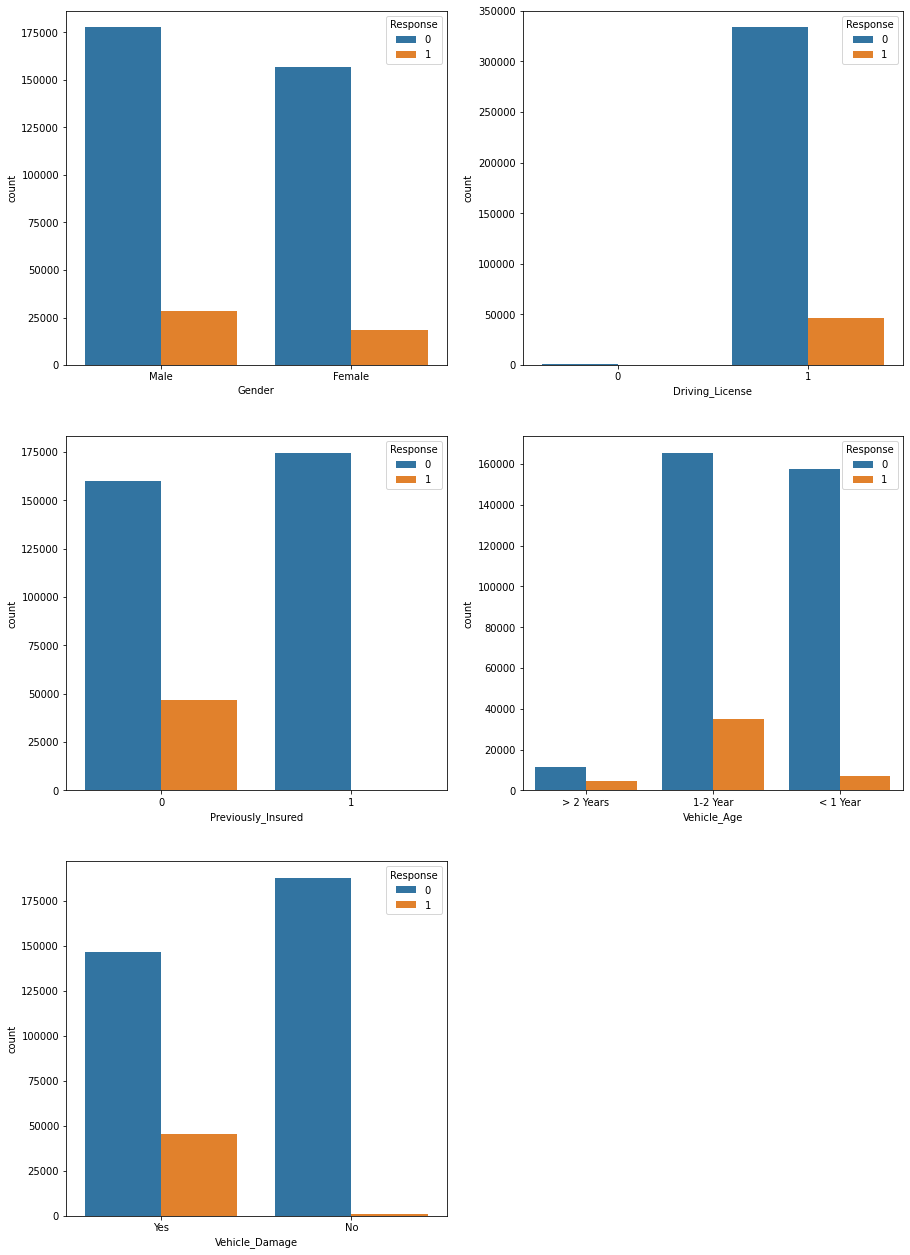

In [28]:
#fig 1. Finding the relation between catorical columns and dependent column
plt.figure(figsize = (15, 30))
a = 1
for i in features:
    plt.subplot(4, 2, a)
    sns.countplot(i, hue = 'Response', data = df) 
    a += 1


Text(0.5, 0, 'Policy Code')

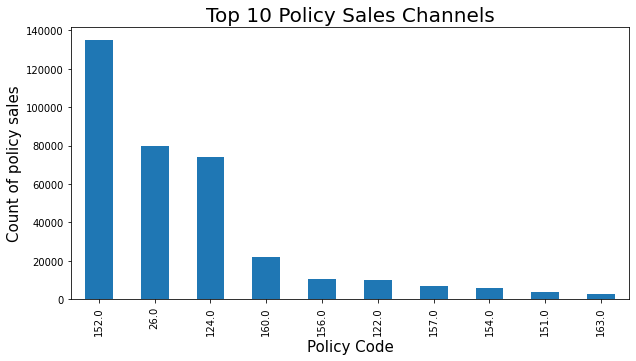

In [29]:
#fig2. getting the top 10 policy sales channels

count_of_top_policy_sales_channels=df['Policy_Sales_Channel'].value_counts()

count_of_top_policy_sales_channels.sort_index()
se=count_of_top_policy_sales_channels.head(10)

plt.subplots(figsize=(10,5))
se.plot.bar()

plt.title('Top 10 Policy Sales Channels', size=20)
plt.ylabel('Count of policy sales',size=15)
plt.xlabel('Policy Code',size=15)

<AxesSubplot:xlabel='Age', ylabel='count'>

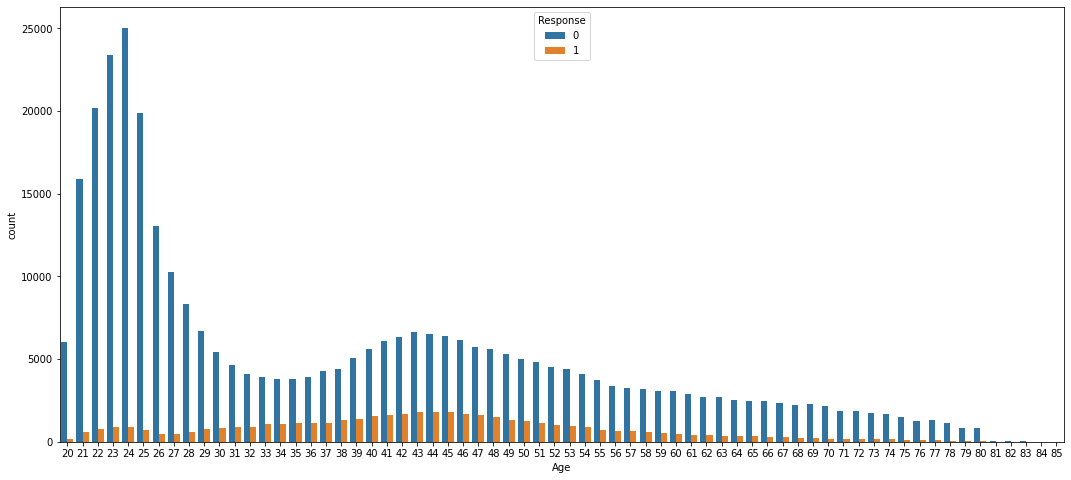

In [30]:
#fig3. getting the comparison between age and response column

plt.figure(figsize = (18, 8))
sns.countplot(df['Age'], hue = df['Response'])

## people ages between from 38 to 50 are more likely to respond
# while people ages between 20 to 30 are less likely to respond

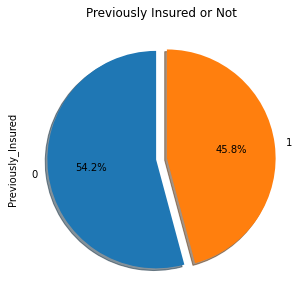

In [31]:
#fig4. previously insured or not

df ['Previously_Insured'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(5,5))
plt.title('Previously Insured or Not')
plt.show()

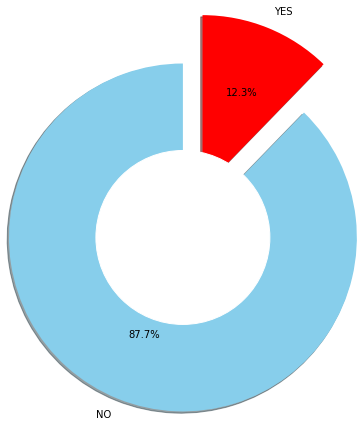

In [32]:
#fig.5 getting the response percentage

data = df['Response'].value_counts()
explode = (0, 0.6)
plt.pie(data, explode = explode,autopct='%1.1f%%',startangle=90,shadow=True,radius = 2.0, labels = ['NO','YES'],colors=['skyblue','red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.show()

<AxesSubplot:>

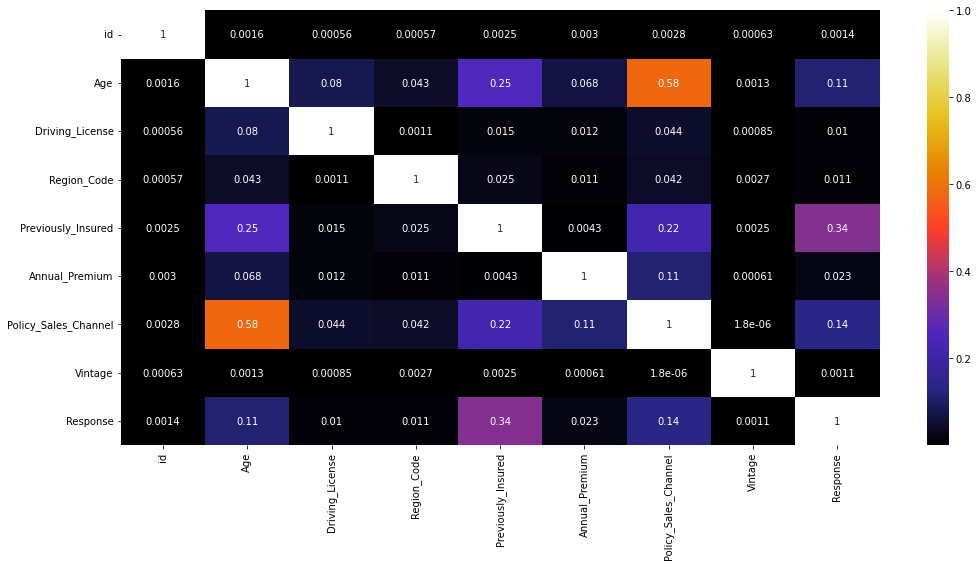

In [33]:
#fig6. Coorelation heatmap

plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap="CMRmap")

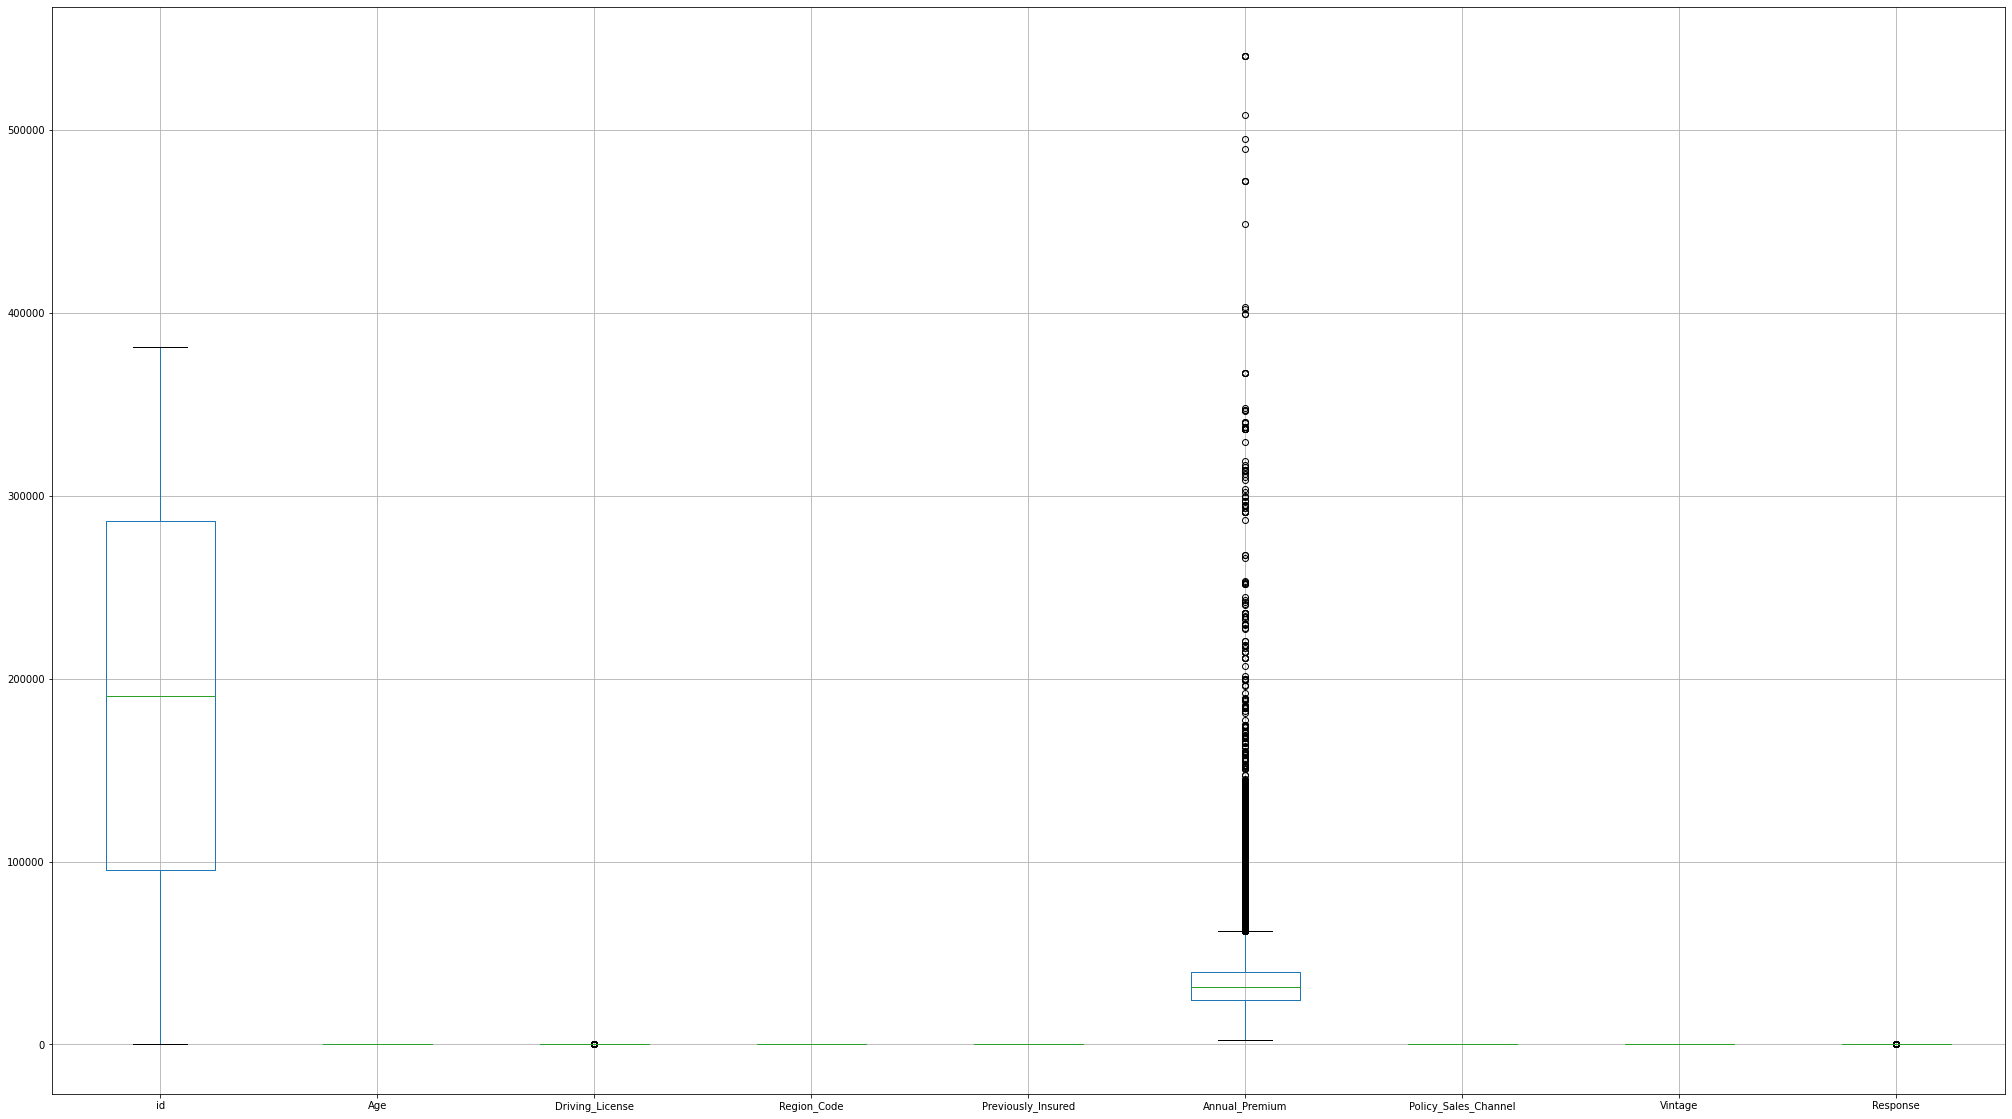

In [34]:
#boxplot for checking outliers

boxplot=df.boxplot(figsize=(35,20))

Based on the available data, we can observe that there are more male customers than female customers who have health insurance. It appears that males are more likely to purchase health insurance. Customers with a driving license are more inclined to consider purchasing health insurance, while those who were previously insured may not necessarily do so. Customers with vehicles aged between 1-2 years are more likely to buy health insurance, while those who have experienced vehicle damage are also more inclined to purchase insurance due to the associated maintenance costs.

Although we lack information on the meaning of policy channel codes, it appears that channel 152.0 outperforms other channels in terms of policy sales. Customers aged between 38 to 50 are more likely to respond to insurance sales, while those aged between 20 to 30 are less likely to do so.

From the data available, we can also infer that 45.8% of customers have been previously insured. Furthermore, only 12.3% of customers have shown interest in purchasing health insurance. Age and policy sales channels appear to be highly correlated, and there are some outliers in the annual premium data.

# 5. Feature Engineering & Data Pre-processing

<AxesSubplot:xlabel='Annual_Premium'>

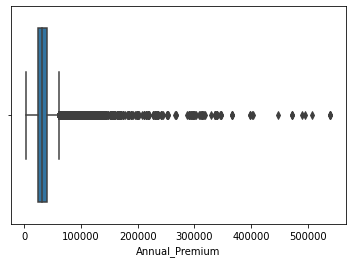

In [35]:
#removing the outliers

sns.boxplot(df['Annual_Premium'])

In [36]:
df['Annual_Premium'].skew()

#column is right skewed as it is positive

1.7660872148961309

In [37]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [38]:
# Finding the IQR
percentile25 = df['Annual_Premium'].quantile(0.25)
percentile75 = df['Annual_Premium'].quantile(0.75)

iqr = percentile75 - percentile25
print(iqr)

14995.0


In [39]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper Limit = ", upper_limit)
print("Lower Limit = ", lower_limit)

Upper Limit =  61892.5
Lower Limit =  1912.5


In [40]:
df[df['Annual_Premium']> upper_limit]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
25,26,Female,21,1,28.0,1,< 1 Year,No,61964.0,152.0,72,0
37,38,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0
67,68,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0
139,140,Male,21,1,29.0,1,< 1 Year,No,62164.0,152.0,116,0
149,150,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258,0
...,...,...,...,...,...,...,...,...,...,...,...,...
380959,380960,Male,25,1,8.0,1,< 1 Year,No,61909.0,152.0,161,0
380998,380999,Female,33,1,8.0,0,1-2 Year,Yes,101664.0,124.0,21,0
381035,381036,Female,22,1,11.0,1,< 1 Year,No,62889.0,152.0,295,0
381047,381048,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233,0


In [41]:
df[df['Annual_Premium']<lower_limit]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [42]:
new_df = df[df['Annual_Premium']< upper_limit]

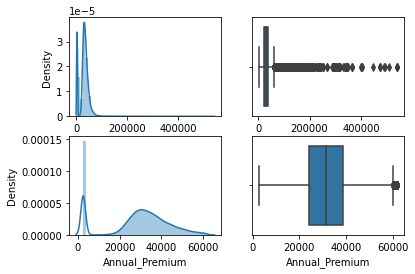

In [43]:
plt.subplot(2,2,1)
sns.distplot(df['Annual_Premium'])

plt.subplot(2,2,2)
sns.boxplot(df['Annual_Premium'])

plt.subplot(2,2,3)
sns.distplot(new_df['Annual_Premium'])

plt.subplot(2,2,4)
sns.boxplot(new_df['Annual_Premium'])

plt.show()

In [44]:
new_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [45]:
#one hot encoding

new_df= pd.get_dummies(new_df, columns= ['Gender','Vehicle_Age','Vehicle_Damage'],drop_first = True)

In [46]:
new_df.drop(['id'], axis=1, inplace = True)

In [47]:
new_df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


In [48]:
new_df.shape

(370789, 12)

In [49]:
new_df.dtypes

Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Response                   int64
Gender_Male                uint8
Vehicle_Age_< 1 Year       uint8
Vehicle_Age_> 2 Years      uint8
Vehicle_Damage_Yes         uint8
dtype: object

<AxesSubplot:>

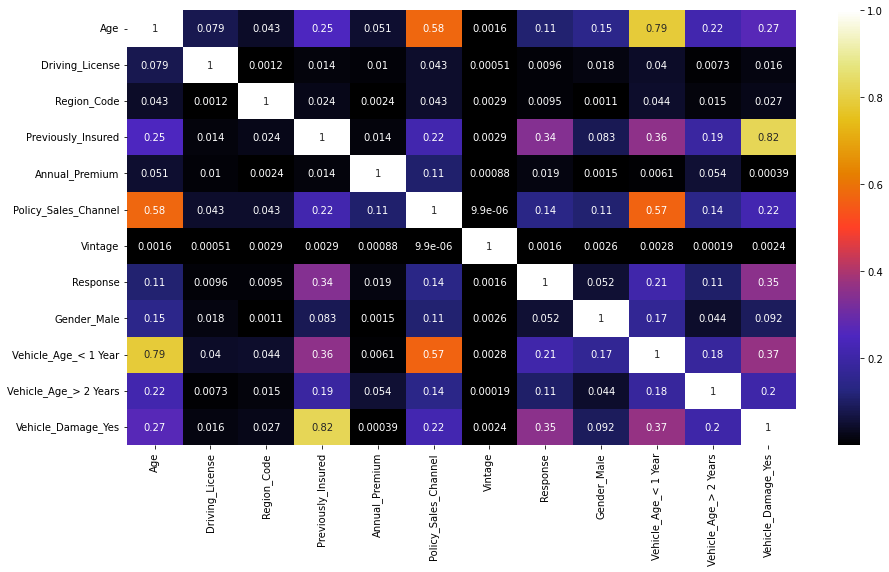

In [50]:
plt.figure(figsize=(15,8))
correlation = new_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='CMRmap')

In [51]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [52]:
features = new_df.drop(['Response'],axis=1)
calc_vif(features)

,variables,VIF
0,Age,19.039604
1,Driving_License,54.669733
2,Region_Code,4.924115
3,Previously_Insured,5.745688
4,Annual_Premium,5.006453
5,Policy_Sales_Channel,8.376855
6,Vintage,4.376051
7,Gender_Male,2.235727
8,Vehicle_Age_< 1 Year,5.181757
9,Vehicle_Age_> 2 Years,1.124545


In [53]:
features2 = new_df.drop(['Response','Driving_License'],axis=1)
calc_vif(features2)

,variables,VIF
0,Age,9.999107
1,Region_Code,4.638757
2,Previously_Insured,5.146922
3,Annual_Premium,4.738776
4,Policy_Sales_Channel,6.816272
5,Vintage,4.164970
6,Gender_Male,2.197374
7,Vehicle_Age_< 1 Year,4.161774
8,Vehicle_Age_> 2 Years,1.120792
9,Vehicle_Damage_Yes,5.367545


In [54]:
features3 = new_df.drop(['Response','Age','Driving_License'],axis=1)
calc_vif(features3)

,variables,VIF
0,Region_Code,4.255316
1,Previously_Insured,4.226289
2,Annual_Premium,4.247838
3,Policy_Sales_Channel,6.695408
4,Vintage,3.903320
5,Gender_Male,2.125134
6,Vehicle_Age_< 1 Year,2.970038
7,Vehicle_Age_> 2 Years,1.106813
8,Vehicle_Damage_Yes,4.359574


<AxesSubplot:>

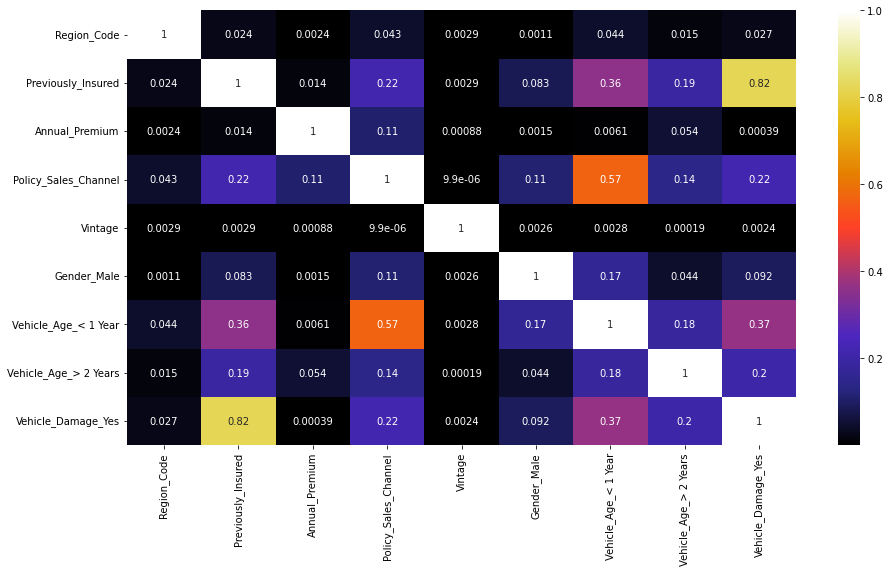

In [55]:
plt.figure(figsize=(15,8))
correlation = features3.corr()
sns.heatmap(abs(correlation), annot=True, cmap='CMRmap')

In [56]:
features4 = new_df.drop(['Response','Age','Driving_License','Previously_Insured'],axis=1)
calc_vif(features4)

,variables,VIF
0,Region_Code,3.985597
1,Annual_Premium,3.861544
2,Policy_Sales_Channel,6.127068
3,Vintage,3.712095
4,Gender_Male,2.079059
5,Vehicle_Age_< 1 Year,2.951545
6,Vehicle_Age_> 2 Years,1.106720
7,Vehicle_Damage_Yes,2.184416


<AxesSubplot:>

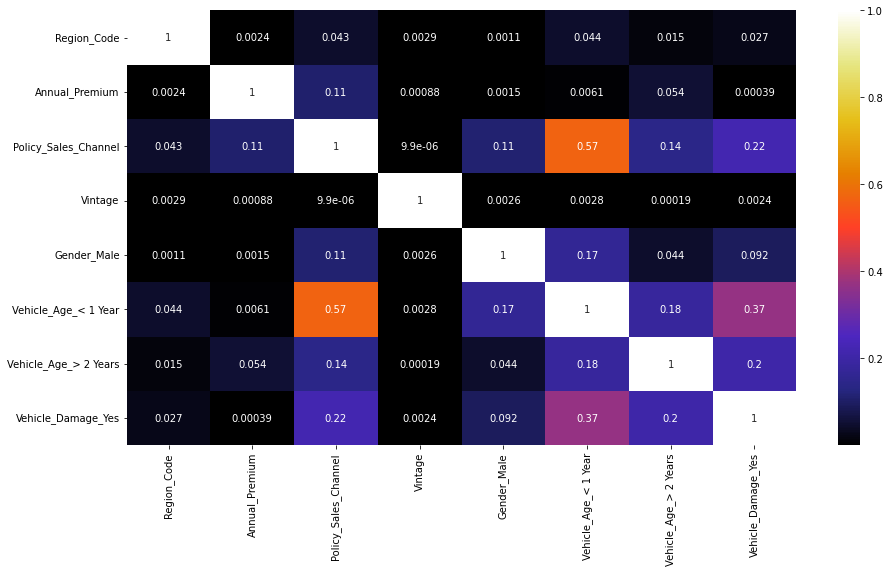

In [57]:
plt.figure(figsize=(15,8))
correlation = features4.corr()
sns.heatmap(abs(correlation), annot=True, cmap='CMRmap')

In [58]:
features5 = new_df.drop(['Response','Age','Driving_License','Previously_Insured','Policy_Sales_Channel'],axis=1)
calc_vif(features5)

,variables,VIF
0,Region_Code,3.740688
1,Annual_Premium,3.779070
2,Vintage,3.500315
3,Gender_Male,2.042401
4,Vehicle_Age_< 1 Year,1.809550
5,Vehicle_Age_> 2 Years,1.105510
6,Vehicle_Damage_Yes,2.127011


<AxesSubplot:>

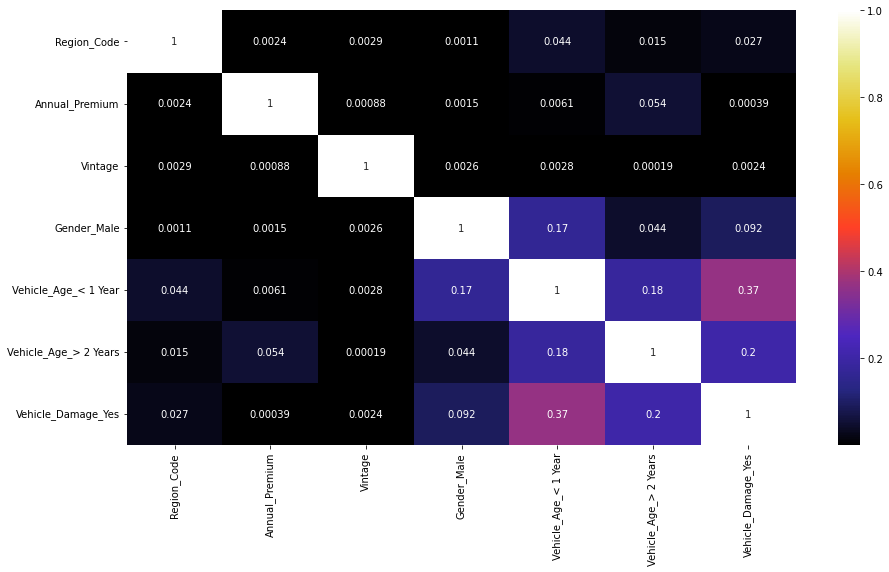

In [59]:
plt.figure(figsize=(15,8))
correlation = features5.corr()
sns.heatmap(abs(correlation), annot=True, cmap='CMRmap')

In [60]:
x= new_df[['Region_Code','Annual_Premium','Vintage','Gender_Male','Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Years','Vehicle_Damage_Yes']]

In [61]:
y= new_df['Response']

In [62]:
#we know from the fig.5 that the data is imbalanced

import imblearn
from imblearn.over_sampling import SMOTE

#using smote to work on the imbalance
SM = SMOTE(random_state = 10)

In [63]:
#fitting the data and converting the x and y to x_sm and y_sm

x_sm, y_sm = SM.fit_resample(x, y)

In [64]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_sm)))

Original dataset shape Counter({0: 325634, 1: 45155})
Resampled dataset shape Counter({1: 325634, 0: 325634})


In [65]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
  x_sm, y_sm, test_size= 0.20, random_state=10)

The available data shows that the annual premium is positively skewed, indicating that the data is not normally distributed. To address the presence of outliers, the interquartile range (IQR) method was used to remove them from the dataset.

After performing one-hot encoding to convert categorical variables to numerical ones, the correlation between the variables increased. To address the issue of multicollinearity, the variance inflation factor (VIF) method was used to remove highly correlated independent variables.

Given the imbalanced nature of the data, the Synthetic Minority Over-sampling Technique (SMOTE) was used to balance the dataset by generating synthetic samples for the minority class.

Finally, the data was split into training and testing sets to build and evaluate the predictive models.

# Model Implementation

## Logestic Regression

The logistic classification model is a binary classification model in which the conditional probability of one of the two possible realizations of the output variable is assumed to be equal to a linear combination of the input variables, transformed by the logistic function.

***Hyper-Parameter Tuning:***

  - solver: Algorithm to use in the optimization problem.

  - penalty: Specify the norm of the penalty.

  - C: Inverse of regularization strength

  - random_state: Controls the randomness of the estimator.


In [ ]:
#fitting and training model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#predicting the model

LogisticRegression_y_test_pred = logreg.predict(x_test)
LogisticRegression_y_train_pred = logreg.predict(x_train)
logreg_accuracy = accuracy_score(y_test,LogisticRegression_y_test_pred)

print("Training accuracy Score    : ",logreg.score(x_train, y_train))
print("Validation accuracy Score : ",logreg_accuracy )

print(classification_report(LogisticRegression_y_test_pred,y_test))

Training accuracy Score    :  0.8045849055879497
Validation accuracy Score :  0.8042900793833586
              precision    recall  f1-score   support

           0       0.69      0.90      0.78     49725
           1       0.92      0.75      0.83     80529

    accuracy                           0.80    130254
   macro avg       0.80      0.82      0.80    130254
weighted avg       0.83      0.80      0.81    130254



[[179021  81542]
 [ 20272 240179]]


[Text(0, 0.5, 'Intrested'), Text(0, 1.5, 'Not-Intrested')]

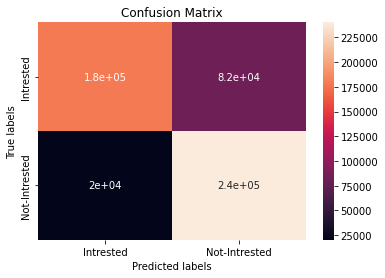

In [ ]:
# Get the confusion matrix for train data

labels = ['Intrested', 'Not-Intrested']
cm = confusion_matrix(y_train, LogisticRegression_y_train_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[44652 20419]
 [ 5073 60110]]


[Text(0, 0.5, 'Intrested'), Text(0, 1.5, 'Not-Intrested')]

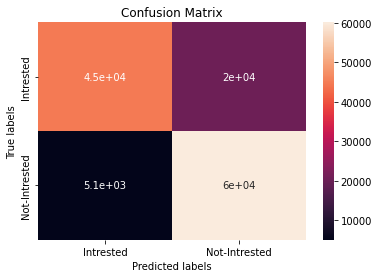

In [ ]:
# Get the confusion matrix for test data

labels = ['Intrested', 'Not-Intrested']
cm = confusion_matrix(y_test, LogisticRegression_y_test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
parameters_LogisticRegression = {'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
                                'penalty' : ['l2'],
                                'C' : [100, 10, 1.0, 0.1, 0.01, 0.001], 
                                'random_state':[2]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

LogesticRegression_rcv = RandomizedSearchCV(estimator=logreg,param_distributions=parameters_LogisticRegression,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)

LogesticRegression_rcv.fit(x_train,y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                                        'penalty': ['l2'], 'random_state': [2],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [ ]:
best_LogesticRegression = LogesticRegression_rcv.best_estimator_

In [ ]:
LogesticRegression_y_test_predRCV = best_LogesticRegression.predict(x_test)
LogesticRegression_y_train_predRCV = best_LogesticRegression.predict(x_train)

logesticregression_accuracyRCV = accuracy_score(y_test,LogesticRegression_y_test_predRCV)
print("Training accuracy Score    : ",best_LogesticRegression.score(x_train, y_train))
print("Validation accuracy Score : ",logesticregression_accuracyRCV )

print(classification_report(LogesticRegression_y_test_predRCV,y_test))

Training accuracy Score    :  0.8079763691570668
Validation accuracy Score :  0.8081671196278042
              precision    recall  f1-score   support

           0       0.71      0.88      0.79     52062
           1       0.91      0.76      0.83     78192

    accuracy                           0.81    130254
   macro avg       0.81      0.82      0.81    130254
weighted avg       0.83      0.81      0.81    130254



From the above results, we can conclude the following:

Both before and after using RandomizedSearchCV, the training accuracy and validation accuracy are both around 80%. This suggests that the logistic regression model is performing well in general.

After using RandomizedSearchCV, the training accuracy has slightly increased from 0.80 to 0.8079763691570668, and the validation accuracy has also slightly increased from 0.80 to 0.8081671196278042. This suggests that RandomizedSearchCV was able to find a better combination of hyperparameters for the logistic regression model that improved its performance.

The precision, recall, and f1-score for both the positive and negative classes have increased slightly after using RandomizedSearchCV. The precision indicates the proportion of positive predictions that are correct, the recall indicates the proportion of positive cases that are correctly identified, and the f1-score is a weighted average of precision and recall. An increase in precision, recall, and f1-score suggests that the logistic regression model is making better predictions after using RandomizedSearchCV.

In general, these results suggest that using RandomizedSearchCV to tune the hyperparameters of the logistic regression model improved its performance, as indicated by the slightly increased accuracy and improved precision, recall, and f1-score.





In [ ]:
LogesticRegression_rcv.best_params_

{'solver': 'newton-cg', 'random_state': 2, 'penalty': 'l2', 'C': 100}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_logesticRegression = {'solver': ['newton-cg'], 
                                  'random_state': [2],
                                  'penalty': ['l2'],
                                  'C': [90,100,110]}

grid_search_logesticRegression = GridSearchCV(estimator=logreg, param_grid=param_grid_logesticRegression, cv=3, n_jobs=-1)

grid_search_logesticRegression.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [90, 100, 110], 'penalty': ['l2'],
                         'random_state': [2], 'solver': ['newton-cg']})

In [ ]:
best_LogesticRegressionGSCV= grid_search_logesticRegression.best_estimator_

In [ ]:
LogesticRegression_y_test_predGSCV = best_LogesticRegressionGSCV.predict(x_test)
LogesticRegression_y_train_predGSCV = best_LogesticRegressionGSCV.predict(x_train)

logesticregression_accuracyGSCV = accuracy_score(y_test,LogesticRegression_y_test_predGSCV)
print("Training accuracy Score    : ",best_LogesticRegressionGSCV.score(x_train, y_train))
print("Validation accuracy Score : ",logesticregression_accuracyGSCV )

print(classification_report(LogesticRegression_y_test_predGSCV,y_test))

Training accuracy Score    :  0.8079763691570668
Validation accuracy Score :  0.8081671196278042
              precision    recall  f1-score   support

           0       0.71      0.88      0.79     52062
           1       0.91      0.76      0.83     78192

    accuracy                           0.81    130254
   macro avg       0.81      0.82      0.81    130254
weighted avg       0.83      0.81      0.81    130254



From the results, we can conclude that both RandomizedSearchCV and GridSearchCV produced similar results in terms of training accuracy, validation accuracy, precision, recall, f1-score, and support. The best parameters found by RandomizedSearchCV were used in GridSearchCV to obtain the best model, and the results indicate that the model is performing well with an accuracy of 0.81.

It is worth noting that both RandomizedSearchCV and GridSearchCV are hyperparameter tuning techniques that are used to optimize the performance of a machine learning model. RandomizedSearchCV samples hyperparameters from a probability distribution, while GridSearchCV exhaustively searches a specified parameter space. In this case, it appears that using RandomizedSearchCV to obtain the best parameters, followed by GridSearchCV to fine-tune those parameters, was effective in finding a good model.

## DecisionTree Classifier

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

*Hyper-Parameter Tuning:*

  - splitter: The strategy used to choose the split at each node.

  - max_depth: The maximum depth of the tree.

  - min_samples_leaf: The minimum number of samples required to be at a leaf node.

  - min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

  - max_features: The number of features to consider when looking for the best split.

  - max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion.

  - random_state: Controls the randomness of the estimator.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modeldt = DecisionTreeClassifier()

modeldt.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
DecisionTree_y_test_pred = modeldt.predict(x_test)
DecisionTree_y_train_pred = modeldt.predict(x_train)

model_accuracy = accuracy_score(y_test, DecisionTree_y_test_pred)

print("Training accuracy Score    : ",modeldt.score(x_train, y_train))
print("Validation accuracy Score : ",model_accuracy )

Training accuracy Score    :  0.9861232135796735
Validation accuracy Score :  0.8758425844887681


In [ ]:
print(classification_report(DecisionTree_y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     62947
           1       0.89      0.86      0.88     67307

    accuracy                           0.88    130254
   macro avg       0.88      0.88      0.88    130254
weighted avg       0.88      0.88      0.88    130254



[[255682   4881]
 [  2349 258102]]


[Text(0, 0.5, 'Intrested'), Text(0, 1.5, 'Not-Intrested')]

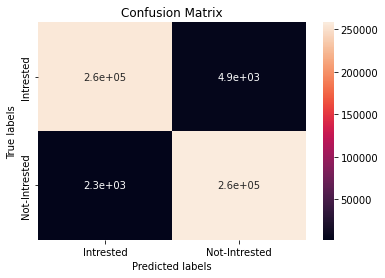

In [ ]:
# Get the confusion matrix for train data

labels = ['Intrested', 'Not-Intrested']
cm = confusion_matrix(y_train, DecisionTree_y_train_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[55923  9148]
 [ 7024 58159]]


[Text(0, 0.5, 'Intrested'), Text(0, 1.5, 'Not-Intrested')]

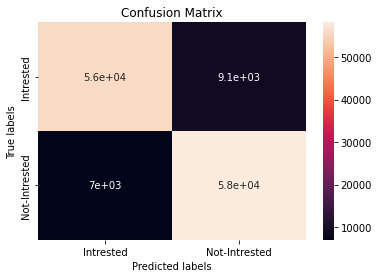

In [ ]:
# Get the confusion matrix for test data

labels = ['Intrested', 'Not-Intrested']
cm = confusion_matrix(y_test, DecisionTree_y_test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
parameters_decision_tree = {"splitter":["best","random"],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60], 
           'random_state':[23]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

decision_tree_rcv = RandomizedSearchCV(estimator=modeldt,param_distributions=parameters_decision_tree,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)

decision_tree_rcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 7, 9],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 30, 40, 50,
                                                           60],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_weight_fraction_leaf': [0.0, 0.3,
                                                                     0.4, 0.5],
                                        'random_state': [23],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [ ]:
best_decisiontree = decision_tree_rcv.best_estimator_


In [ ]:
Decisiontree_y_test_predRCV = best_decisiontree.predict(x_test)
Decisiontree_y_train_predRCV = best_decisiontree.predict(x_train)

decisiontree_accuracyRCV = accuracy_score(y_test,Decisiontree_y_test_predRCV)
print("Training accuracy Score    : ",best_decisiontree.score(x_train, y_train))
print("Validation accuracy Score : ",decisiontree_accuracyRCV )

print(classification_report(Decisiontree_y_test_predRCV,y_test))

Training accuracy Score    :  0.9114169676822503
Validation accuracy Score :  0.8325963118215179
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     63856
           1       0.84      0.83      0.83     66398

    accuracy                           0.83    130254
   macro avg       0.83      0.83      0.83    130254
weighted avg       0.83      0.83      0.83    130254



Based on the results, it appears that random search CV resulted in a decrease in the accuracy and precision scores. The training accuracy score decreased from 0.98 to 0.91, and the validation accuracy score decreased from 0.87 to 0.83. The precision and recall scores also decreased slightly for both class 0 and class 1. These results suggest that the model may have overfit to the training data, as the training accuracy decreased while the validation accuracy decreased. Overall, it seems that the model may not be performing as well as it did before random search CV was used.

In [ ]:
decision_tree_rcv.best_params_

{'splitter': 'best',
 'random_state': 23,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_leaf': 3,
 'max_leaf_nodes': None,
 'max_features': 'sqrt',
 'max_depth': None}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_decisiontree = {
                          'splitter': ['best'],
                          'random_state': [23],
                          'min_weight_fraction_leaf': [0.0,0.1,0.2],
                          'min_samples_leaf': [1,2,3,4,5],
                          'max_leaf_nodes': [None, 5, 10, 20, 50],
                          'max_features': ['sqrt'],
                          'max_depth': [None, 5, 10, 20, 50]
                           }

grid_search_decisiontree = GridSearchCV(estimator=modeldt, param_grid=param_grid_decisiontree, cv=3, n_jobs=-1)

grid_search_decisiontree.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 50],
                         'max_features': ['sqrt'],
                         'max_leaf_nodes': [None, 5, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
                         'random_state': [23], 'splitter': ['best']})

In [ ]:
best_decisiontreeGSCV= grid_search_decisiontree.best_estimator_

In [ ]:
decisiontree_y_test_predGSCV = best_decisiontreeGSCV.predict(x_test)
decisiontree_y_train_predGSCV = best_decisiontreeGSCV.predict(x_train)

decisiontree_accuracyGSCV = accuracy_score(y_test,decisiontree_y_test_predGSCV)
print("Training accuracy Score    : ",best_decisiontreeGSCV.score(x_train, y_train))
print("Validation accuracy Score : ",decisiontree_accuracyGSCV )

print(classification_report(decisiontree_y_test_predGSCV,y_test))

Training accuracy Score    :  0.9854418499310958
Validation accuracy Score :  0.8445345248514441
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     63097
           1       0.86      0.83      0.85     67157

    accuracy                           0.84    130254
   macro avg       0.84      0.84      0.84    130254
weighted avg       0.84      0.84      0.84    130254



Based on the accuracy scores and classification reports, we can conclude that the decision tree model performs very well even without hyperparameter tuning, with a training accuracy of 0.986 and validation accuracy of 0.876. However, after applying hyperparameter tuning using RandomizedSearchCV and GridSearchCV, we observe a slight reduction in the validation accuracy score to 0.833 and 0.845 respectively. This indicates that the initial decision tree model may not have been overfitting significantly, and that the default hyperparameters chosen by the model were already close to the optimal values. In this case, we may not see significant improvement in model performance by applying hyperparameter tuning, and can instead use the initial model as a reliable baseline.

## Random-Forest 
Random forest is an ensemble learning method for classification, regression and other tasks that operate by constructing multiple decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

**Hyper-Parameter Tuning-**

- Number of trees (n_estimators): The number of decision trees to include in the forest.
- Maximum depth of the trees (max_depth): The maximum number of levels allowed in each decision tree.
- Minimum number of samples required to split a node (min_samples_split): The minimum number of samples required in a node before it can be split.
- Minimum number of samples required to be at a leaf node (min_samples_leaf): The minimum number of samples required in a leaf node.
- Maximum number of features to consider when looking for the best split (max_features): The number of features to consider when making each split in the tree.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
RandomForest_y_test_pred = rf_clf.predict(x_test)
RandomForest_y_train_pred = rf_clf.predict(x_train)

rf_accuracy = accuracy_score(y_test,RandomForest_y_test_pred)
print("Training accuracy Score    : ",rf_clf.score(x_train, y_train))
print("Validation accuracy Score : ",rf_accuracy )

Training accuracy Score    :  0.9861059395716814
Validation accuracy Score :  0.87024582738342


In [ ]:
print(classification_report(RandomForest_y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     62508
           1       0.89      0.86      0.87     67746

    accuracy                           0.87    130254
   macro avg       0.87      0.87      0.87    130254
weighted avg       0.87      0.87      0.87    130254



[[254970   5593]
 [  1646 258805]]


[Text(0, 0.5, 'Intrested'), Text(0, 1.5, 'Not-Intrested')]

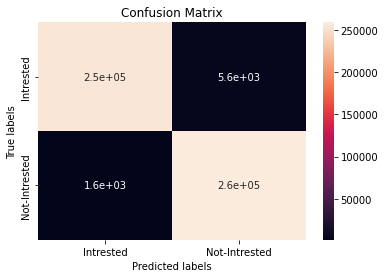

In [ ]:
# Get the confusion matrix for train data

labels = ['Intrested', 'Not-Intrested']
cm = confusion_matrix(y_train, RandomForest_y_train_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[55339  9732]
 [ 7169 58014]]


[Text(0, 0.5, 'Intrested'), Text(0, 1.5, 'Not-Intrested')]

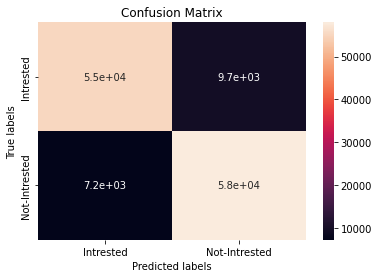

In [ ]:
# Get the confusion matrix for test data

labels = ['Intrested', 'Not-Intrested']
cm = confusion_matrix(y_test, RandomForest_y_test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
parameters_RandomForest = {
           "n_estimators":[10,20,30,40,50],
           "criterion": ['gini', 'entropy', 'log_loss'],
           "max_depth" : [None,5,10,15,20],
           "min_samples_leaf":[None,10,20,40,80,100],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60],
           'random_state':[23]
           }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

RandomForest_rcv = RandomizedSearchCV(estimator=rf_clf,param_distributions=parameters_RandomForest,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)

RandomForest_rcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 30, 40, 50,
                                                           60],
                                        'min_samples_leaf': [None, 10, 20, 40,
                                                             80, 100],
                                        'n_estimators': [10, 20, 30, 40, 50],
                                        'random_state': [23]},
                   random_state=100, verbose=2)

In [ ]:
RandomForest_y_test_predRCV = RandomForest_rcv.predict(x_test)
RandomForest_y_train_predRCV = RandomForest_rcv.predict(x_train)

rf_accuracy_RCV = accuracy_score(y_test,RandomForest_y_test_predRCV)
print("Training accuracy Score    : ",RandomForest_rcv.score(x_train, y_train))
print("Validation accuracy Score : ",rf_accuracy_RCV )

print(classification_report(RandomForest_y_test_predRCV,y_test))

Training accuracy Score    :  0.8634604828277167
Validation accuracy Score :  0.8547837302501267
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     61066
           1       0.89      0.83      0.86     69188

    accuracy                           0.85    130254
   macro avg       0.85      0.86      0.85    130254
weighted avg       0.86      0.85      0.85    130254



Before applying Random Search CV, we trained the model with default hyperparameters, and the training accuracy score was 0.986 and the validation accuracy score was 0.870.

After applying Random Search CV, the training accuracy score decreased to 0.863, and the validation accuracy score decreased slightly to 0.855.

The precision, recall, and F1-score for both classes (0 and 1) are fairly similar in both cases.

From this, we can conclude that the default hyperparameters of the Random Forest model were already performing well, and the hyperparameters tuned through Random Search CV did not result in significant improvements in the model's performance.

In [ ]:
RandomForest_rcv.best_params_

{'random_state': 23,
 'n_estimators': 10,
 'min_samples_leaf': 20,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': 20,
 'criterion': 'entropy'}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_randomforest = {
                          'random_state': [23],
                          'n_estimators': [9,10,11],
                          'min_samples_leaf': [19,20,21],
                          'max_depth': [19,20,21],
                          'criterion': ['entropy']
                          }

grid_search_randomforest = GridSearchCV(estimator=rf_clf, param_grid=param_grid_randomforest, cv=3, n_jobs=-1)

grid_search_randomforest.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [19, 20, 21],
                         'min_samples_leaf': [19, 20, 21],
                         'n_estimators': [9, 10, 11], 'random_state': [23]})

In [ ]:
grid_search_randomforest.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=21, min_samples_leaf=19,
                       n_estimators=11, random_state=23)

In [ ]:
best_randomforestGSCV= grid_search_randomforest.best_estimator_

In [ ]:
randomforest_y_test_predGSCV = best_randomforestGSCV.predict(x_test)
randomforest_y_train_predGSCV = best_randomforestGSCV.predict(x_train)

randomforest_accuracyGSCV = accuracy_score(y_test,randomforest_y_test_predGSCV)
print("Training accuracy Score    : ",best_randomforestGSCV.score(x_train, y_train))
print("Validation accuracy Score : ",randomforest_accuracyGSCV )

print(classification_report(randomforest_y_test_predGSCV,y_test))

Training accuracy Score    :  0.8363038229299021
Validation accuracy Score :  0.829003331951418
              precision    recall  f1-score   support

           0       0.77      0.87      0.82     57638
           1       0.89      0.80      0.84     72616

    accuracy                           0.83    130254
   macro avg       0.83      0.83      0.83    130254
weighted avg       0.84      0.83      0.83    130254



Before performing hyperparameter tuning, the model had a training accuracy of 0.986 and a validation accuracy of 0.870. After performing RandomizedSearchCV or GridSearchCV, the training accuracy decreased to 0.863 or 0.836, and the validation accuracy decreased to 0.855 or 0.829, respectively.

The results suggest that further investigation of the hyperparameters that were selected and exploring other combinations of hyperparameters is necessary. Other techniques such as feature selection, model ensembling, or using a different type of model should also be considered to improve the performance of the model.

While the accuracy is an important metric to evaluate the performance of a classification model, it's important to consider other metrics such as precision, recall, and f1-score, which can provide insights into how the model is performing for each class.

Overall, the results suggest that the model needs further improvement to make it a more reliable tool for classification. Further experimentation and optimization are necessary to improve the model's performance, and additional domain-specific knowledge should be incorporated to further enhance its performance.

## AdaBoost Classifier

AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.

*Hyper-Parameter Tuning:*
  * n_estimators: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

  * learning_rate: Weight applied to each classifier at each boosting iteration.

  * random_state: Controls the randomness of the estimator.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
AdaBoost_y_test_pred = adb.predict(x_test)
AdaBoost_y_train_pred = adb.predict(x_train)

model_accuracy = accuracy_score(y_test, AdaBoost_y_test_pred)

print("Training accuracy Score    : ",adb.score(x_train, y_train))
print("Validation accuracy Score : ",model_accuracy )

print(classification_report(AdaBoost_y_test_pred,y_test))

Training accuracy Score    :  0.813252618931545
Validation accuracy Score :  0.813856004422129
              precision    recall  f1-score   support

           0       0.74      0.87      0.80     55633
           1       0.89      0.77      0.83     74621

    accuracy                           0.81    130254
   macro avg       0.81      0.82      0.81    130254
weighted avg       0.82      0.81      0.81    130254



[[193045  67518]
 [ 29780 230671]]


[Text(0.5, 0, 'Intrested'), Text(1.5, 0, 'Not-Intrested')]

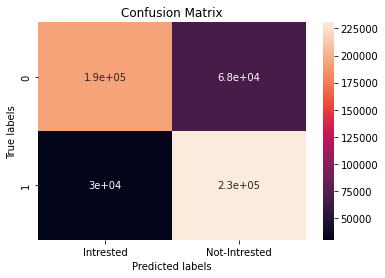

In [ ]:
# Get the confusion matrix for train data

labels = ['Intrested', 'Not-Intrested']
cm = confusion_matrix(y_train, AdaBoost_y_train_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

[[48229 16842]
 [ 7404 57779]]


[Text(0, 0.5, 'Intrested'), Text(0, 1.5, 'Not-Intrested')]

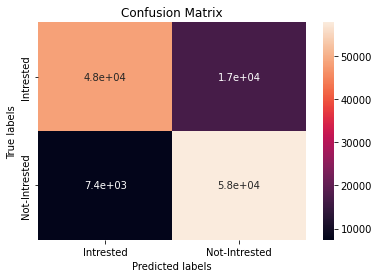

In [ ]:
# Get the confusion matrix for test data

labels = ['Intrested', 'Not-Intrested']
cm = confusion_matrix(y_test, AdaBoost_y_test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
parameters_ada = {'n_estimators':[10, 100],
              'learning_rate':[0.001, 0.01],
              'random_state':[2]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

AdaBoost_rcv = RandomizedSearchCV(estimator=adb,param_distributions=parameters_ada,n_iter=100,cv=2,verbose=2,random_state=100,n_jobs=-1)

AdaBoost_rcv.fit(x_train,y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


RandomizedSearchCV(cv=2, estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01],
                                        'n_estimators': [10, 100],
                                        'random_state': [2]},
                   random_state=100, verbose=2)

In [ ]:
AdaBoost_y_test_predRCV = AdaBoost_rcv.predict(x_test)
AdaBoost_y_train_predRCV = AdaBoost_rcv.predict(x_train)

AdaBoost_accuracy_RCV = accuracy_score(y_test,AdaBoost_y_test_predRCV)
print("Training accuracy Score    : ",AdaBoost_rcv.score(x_train, y_train))
print("Validation accuracy Score : ",AdaBoost_accuracy_RCV )

print(classification_report(AdaBoost_y_test_predRCV,y_test))

Training accuracy Score    :  0.8048113870260684
Validation accuracy Score :  0.8044973666835568
              precision    recall  f1-score   support

           0       0.69      0.90      0.78     49770
           1       0.92      0.75      0.83     80484

    accuracy                           0.80    130254
   macro avg       0.80      0.82      0.80    130254
weighted avg       0.83      0.80      0.81    130254



The initial results show a training accuracy of 0.81 and a validation accuracy of 0.81. The precision, recall, and F1-score for both classes (0 and 1) are also provided.

After using random search for hyperparameter tuning, the training accuracy decreased slightly to 0.805, and the validation accuracy also decreased slightly to 0.804. However, the precision, recall, and F1-score for both classes remain relatively similar to the initial results.

Overall, it appears that the random search did not significantly improve the model's performance, as the changes in accuracy are small.

In [ ]:
AdaBoost_rcv.best_params_

{'random_state': 2, 'n_estimators': 100, 'learning_rate': 0.01}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_AdaBoost = {
                        'random_state': [2],
                        'n_estimators': [100,110],
                        'learning_rate': [0.01,0.02]
                        }

grid_search_AdaBoost = GridSearchCV(estimator=adb, param_grid=param_grid_AdaBoost, cv=2, n_jobs=-1)

grid_search_AdaBoost.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02],
                         'n_estimators': [100, 110], 'random_state': [2]})

In [ ]:
grid_search_AdaBoost.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=100, random_state=2)

In [ ]:
best_AdaBoostGSCV= grid_search_AdaBoost.best_estimator_

In [ ]:
AdaBoost_y_test_predGSCV = best_AdaBoostGSCV.predict(x_test)
AdaBoost_y_train_predGSCV = best_AdaBoostGSCV.predict(x_train)

AdaBoost_accuracyGSCV = accuracy_score(y_test,AdaBoost_y_test_predGSCV)
print("Training accuracy Score    : ",best_AdaBoostGSCV.score(x_train, y_train))
print("Validation accuracy Score : ",AdaBoost_accuracyGSCV )

print(classification_report(AdaBoost_y_test_predGSCV,y_test))

Training accuracy Score    :  0.8048113870260684
Validation accuracy Score :  0.8044973666835568
              precision    recall  f1-score   support

           0       0.69      0.90      0.78     49770
           1       0.92      0.75      0.83     80484

    accuracy                           0.80    130254
   macro avg       0.80      0.82      0.80    130254
weighted avg       0.83      0.80      0.81    130254



The results indicate that the initial model had a training accuracy score of 0.813 and a validation accuracy score of 0.814. After applying random search CV, the training accuracy score decreased to 0.805, and the validation accuracy score decreased to 0.804. This suggests that the initial model might have been slightly overfitting the data. However, it's worth noting that the difference in accuracy scores between the initial model and the random search CV model is not significant.

After applying grid search CV, the training accuracy score and the validation accuracy score remained the same as the random search CV model. This suggests that the optimal hyperparameters were already found during the random search CV process.

Overall, it can be concluded that the initial model was performing well, and the application of hyperparameter tuning did not significantly improve its performance. However, it's worth noting that the evaluation is not only based on accuracy, and other metrics such as precision, recall, and F1-score should also be considered.

## Conclusion-

Decision tree model performed the best out of all the models evaluated. The decision tree model had a training accuracy of 0.986 and a validation accuracy of 0.876, indicating that it is able to generalize well to unseen data.

While logistic regression also performed well, with a validation accuracy of around 0.80, it did not perform as well as the decision tree model.

It is important to note that hyperparameter tuning using random search and grid search did not lead to significant improvements in performance for any of the models.

Overall, based on the evaluation of the models, it may be recommended to use the decision tree model for this project, as it provides a high level of accuracy and is able to generalize well. However, it is important to note that further analysis and evaluation may be necessary to determine the best model for this specific project.